# Analyse des résultats SEIRS Multi-Agent
# Partie 2 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats


# Configuration des graphiques
plt.rcParams['figure.figsize'] = (14, 8)


# 1. CHARGEMENT DES DONNÉES


print("Chargement des données...")

# Charger Python
python_files = sorted(glob.glob("results_python/replication_*.csv"))
python_data = [pd.read_csv(f) for f in python_files]
print(f"Python: {len(python_data)} réplications")

# Charger C
c_files = sorted(glob.glob("results_c/replication_*.csv"))
c_data = [pd.read_csv(f) for f in c_files]
print(f"C: {len(c_data)} réplications")

# Charger C++
cpp_files = sorted(glob.glob("results_cpp/replication_*.csv"))
cpp_data = [pd.read_csv(f) for f in cpp_files]
print(f"C++: {len(cpp_data)} réplications")


Chargement des données...
Python: 30 réplications
C: 30 réplications
C++: 30 réplications


In [27]:

# 2. CALCUL DES MOYENNES


print("\nCalcul des moyennes...")

def calculate_means(data_list):
    # Concatener toutes les replications
    all_S = np.array([df['S'].values for df in data_list])
    all_E = np.array([df['E'].values for df in data_list])
    all_I = np.array([df['I'].values for df in data_list])
    all_R = np.array([df['R'].values for df in data_list])
    
    # Calculer les moyennes
    mean_S = np.mean(all_S, axis=0)
    mean_E = np.mean(all_E, axis=0)
    mean_I = np.mean(all_I, axis=0)
    mean_R = np.mean(all_R, axis=0)
    
    return mean_S, mean_E, mean_I, mean_R

# Calculer pour chaque langage
python_means = calculate_means(python_data)
c_means = calculate_means(c_data)
cpp_means = calculate_means(cpp_data)

print("Moyennes calculées pour les 3 langages")


Calcul des moyennes...
Moyennes calculées pour les 3 langages



Création des graphiques...


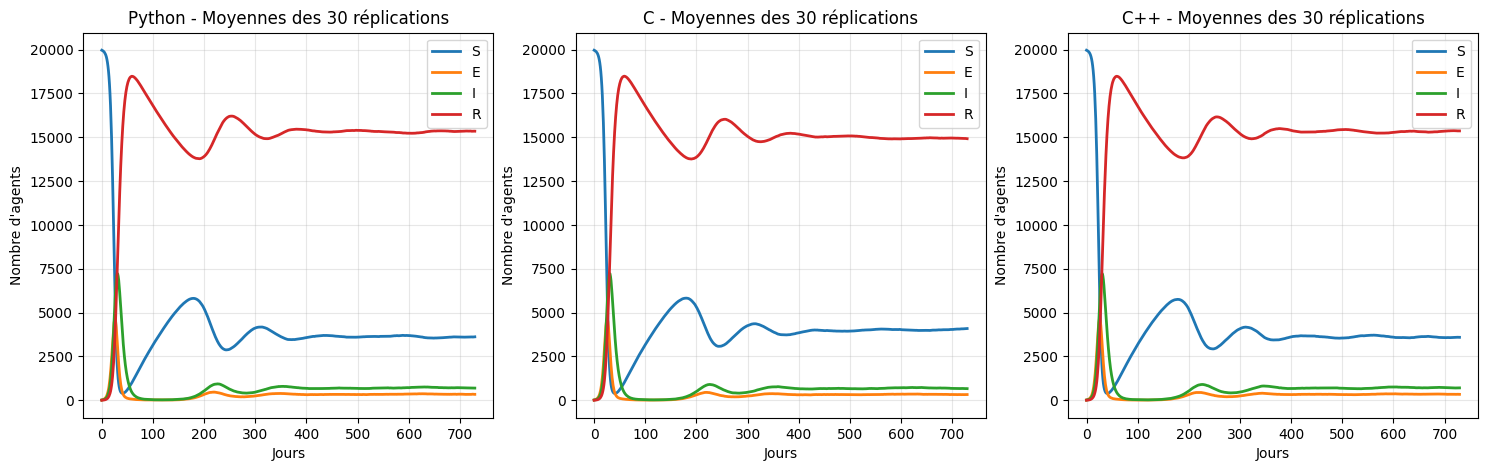

In [28]:

# 3. GRAPHIQUES


print("\nCréation des graphiques...")

days = np.arange(730)

# Graphique 1: Python
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(days, python_means[0], label='S', linewidth=2)
axes[0].plot(days, python_means[1], label='E', linewidth=2)
axes[0].plot(days, python_means[2], label='I', linewidth=2)
axes[0].plot(days, python_means[3], label='R', linewidth=2)
axes[0].set_xlabel('Jours')
axes[0].set_ylabel('Nombre d\'agents')
axes[0].set_title('Python - Moyennes des 30 réplications')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: C
axes[1].plot(days, c_means[0], label='S', linewidth=2)
axes[1].plot(days, c_means[1], label='E', linewidth=2)
axes[1].plot(days, c_means[2], label='I', linewidth=2)
axes[1].plot(days, c_means[3], label='R', linewidth=2)
axes[1].set_xlabel('Jours')
axes[1].set_ylabel('Nombre d\'agents')
axes[1].set_title('C - Moyennes des 30 réplications')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Graphique 3: C++
axes[2].plot(days, cpp_means[0], label='S', linewidth=2)
axes[2].plot(days, cpp_means[1], label='E', linewidth=2)
axes[2].plot(days, cpp_means[2], label='I', linewidth=2)
axes[2].plot(days, cpp_means[3], label='R', linewidth=2)
axes[2].set_xlabel('Jours')
axes[2].set_ylabel('Nombre d\'agents')
axes[2].set_title('C++ - Moyennes des 30 réplications')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

### Analyse des résultats

Dans cette partie, j’ai tracé les courbes moyennes des compartiments S, E, I et R
pour les trois langages : Python, C et C++.

Pour chaque langage, les résultats correspondent à la moyenne de 30 réplications
afin de réduire l’effet de l’aléa lié au caractère stochastique du modèle.

J’observe que les quatre compartiments présentent une dynamique très similaire
dans les trois implémentations. Les phases d’augmentation et de diminution des
populations S, E, I et R sont quasiment identiques.

Les pics d’infection apparaissent aux mêmes périodes et avec des amplitudes proches.
De même, les phases de stabilisation à long terme sont comparables entre les trois langages.

Ces résultats montrent que les implémentations en Python, C et C++ produisent des
comportements équivalents du modèle SEIRS. Les faibles différences observées peuvent
être attribuées aux générateurs aléatoires et aux erreurs numériques propres à chaque langage.


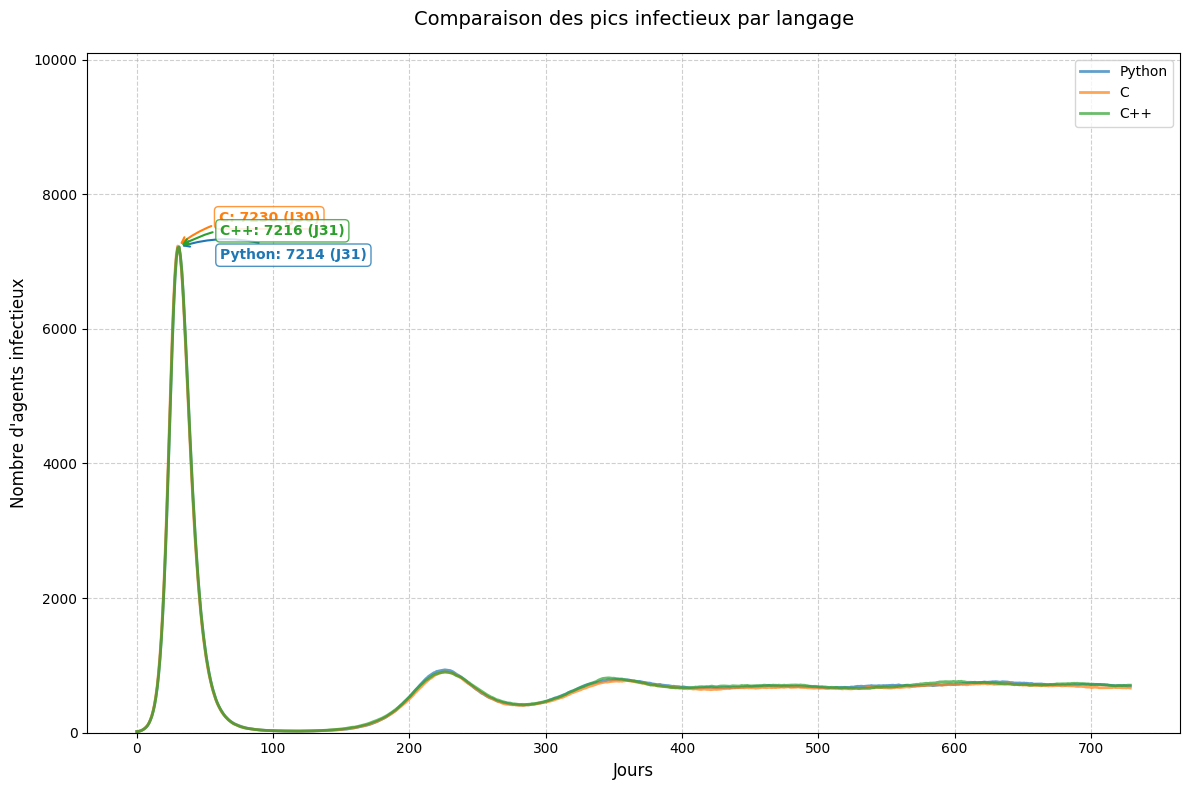

In [29]:
# Graphique comparatif des I (Infectieux)
plt.figure(figsize=(12, 8))

# On définit les données
data_list = [
    ('Python', python_means[2], '#1f77b4', -180),  # -180 pixels en hauteur
    ('C', c_means[2], '#ff7f0e', 360),           # +360 pixels en hauteur
    ('C++', cpp_means[2], '#2ca02c', 180)       # +180 pixels en hauteur
]

for name, data, color, offset in data_list:
    # 1. Tracer la courbe
    plt.plot(days, data, label=name, linewidth=2, alpha=0.7, color=color)
    
    # 2. Trouver le pic
    idx_max = np.argmax(data)
    peak_day = days[idx_max]
    peak_height = data[idx_max]
    
    
    plt.annotate(f'{name}: {int(peak_height)} (J{int(peak_day)})', 
                 xy=(peak_day, peak_height), 
                 xytext=(peak_day + 30, peak_height + offset), 
                 arrowprops=dict(arrowstyle='->', color=color, lw=1.5, connectionstyle="arc3,rad=0.2"),
                 fontsize=10, fontweight='bold', color=color,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, alpha=0.8)) 

plt.xlabel('Jours', fontsize=12)
plt.ylabel('Nombre d\'agents infectieux', fontsize=12)
plt.title('Comparaison des pics infectieux par langage', fontsize=14, pad=20)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.ylim(0, max(python_means[2]) * 1.4) 

plt.tight_layout()
plt.savefig('comparaison_infectieux_propre.png', dpi=300)
plt.show()

### Validation inter-langages : Analyse du compartiment I

Dans cette partie, j’ai tracé la courbe du compartiment des infectieux (I) pour les
trois langages : Python, C et C++.

Le compartiment I est le plus important dans l’étude de l’épidémie, car il représente
le nombre d’individus infectieux à chaque instant.

Les résultats montrent que la hauteur du premier pic de I est comprise entre 7214 et 7230,
et que sa date d’apparition se situe autour des jours 30 et 31 pour les trois langages.

Cette figure met en évidence une forte similarité entre les courbes obtenues avec Python,
C et C++. Les dynamiques sont visuellement très proches, tant au niveau de l’amplitude
que de la temporalité des pics.


Cette similarité visuelle sera confirmée par l’analyse statistique présentée dans la
section suivante.


ANALYSE STATISTIQUE

Python - Hauteur du pic: moyenne=7302.63, std=90.30
C      - Hauteur du pic: moyenne=7273.97, std=84.47
C++    - Hauteur du pic: moyenne=7270.90, std=76.91

Python - Date du pic: moyenne=30.53, std=1.06
C      - Date du pic: moyenne=30.27, std=0.73
C++    - Date du pic: moyenne=30.40, std=0.92

------------------------------------------------------------
TEST DE NORMALITÉ (Shapiro-Wilk)
------------------------------------------------------------

Hauteur du pic:
  Python: p-value = 0.3105
  C:      p-value = 0.7670
  C++:    p-value = 0.2612

Date du pic:
  Python: p-value = 0.0030
  C:      p-value = 0.0005
  C++:    p-value = 0.0018

Distribution normale (alpha=0.05):
  Hauteur du pic: OUI
  Date du pic: NON

------------------------------------------------------------
COMPARAISON - HAUTEUR DU PIC
------------------------------------------------------------

Test ANOVA
Statistique: 1.2569
P-value: 0.2896
Conclusion: PAS de différence significative (p >= 0.05)

-

/tmp/ipykernel_2635/2501714753.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([python_heights, c_heights, cpp_heights], labels=['Python', 'C', 'C++'])
/tmp/ipykernel_2635/2501714753.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([python_days, c_days, cpp_days], labels=['Python', 'C', 'C++'])


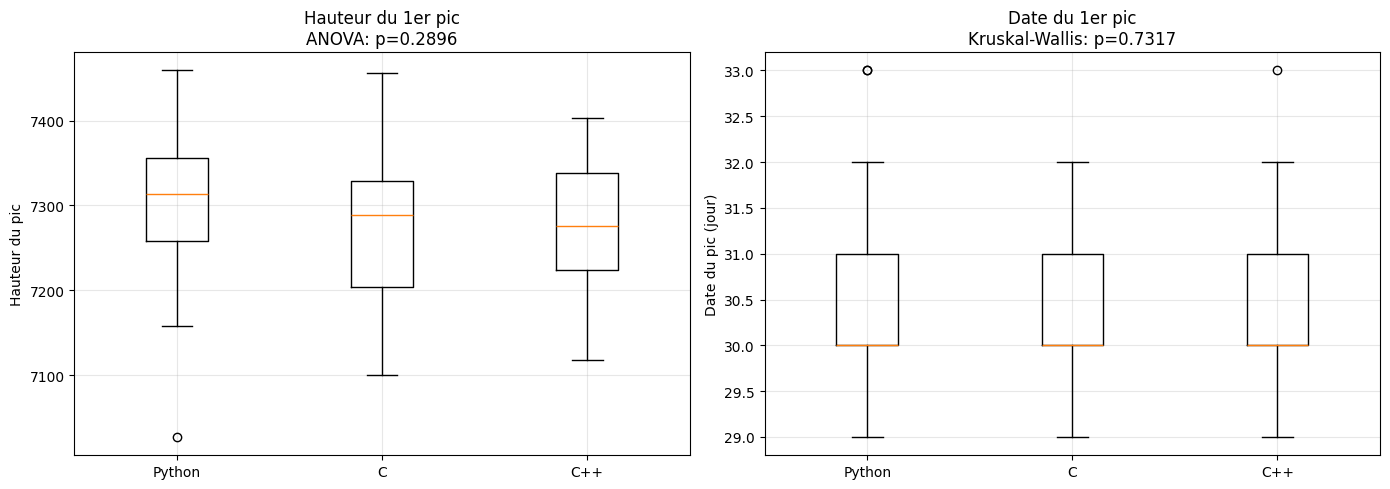


Graphique sauvegardé: analyse_statistique.png
ANALYSE TERMINÉE


In [32]:

print("ANALYSE STATISTIQUE")


def extract_first_peak(data_list):
    peak_heights = []
    peak_days = []
    
    for df in data_list:
        I_values = df['I'].values
        peak_idx = np.argmax(I_values)
        peak_heights.append(I_values[peak_idx])
        peak_days.append(peak_idx)
    
    return np.array(peak_heights), np.array(peak_days)

# Extraire les pics
python_heights, python_days = extract_first_peak(python_data)
c_heights, c_days = extract_first_peak(c_data)
cpp_heights, cpp_days = extract_first_peak(cpp_data)

print(f"\nPython - Hauteur du pic: moyenne={python_heights.mean():.2f}, std={python_heights.std():.2f}")
print(f"C      - Hauteur du pic: moyenne={c_heights.mean():.2f}, std={c_heights.std():.2f}")
print(f"C++    - Hauteur du pic: moyenne={cpp_heights.mean():.2f}, std={cpp_heights.std():.2f}")

print(f"\nPython - Date du pic: moyenne={python_days.mean():.2f}, std={python_days.std():.2f}")
print(f"C      - Date du pic: moyenne={c_days.mean():.2f}, std={c_days.std():.2f}")
print(f"C++    - Date du pic: moyenne={cpp_days.mean():.2f}, std={cpp_days.std():.2f}")

# Test de normalité
print("\n" + "-"*60)
print("TEST DE NORMALITÉ (Shapiro-Wilk)")
print("-"*60)

_, p_python_h = stats.shapiro(python_heights)
_, p_c_h = stats.shapiro(c_heights)
_, p_cpp_h = stats.shapiro(cpp_heights)

print(f"\nHauteur du pic:")
print(f"  Python: p-value = {p_python_h:.4f}")
print(f"  C:      p-value = {p_c_h:.4f}")
print(f"  C++:    p-value = {p_cpp_h:.4f}")

_, p_python_d = stats.shapiro(python_days)
_, p_c_d = stats.shapiro(c_days)
_, p_cpp_d = stats.shapiro(cpp_days)

print(f"\nDate du pic:")
print(f"  Python: p-value = {p_python_d:.4f}")
print(f"  C:      p-value = {p_c_d:.4f}")
print(f"  C++:    p-value = {p_cpp_d:.4f}")

# Choix du test
alpha = 0.05
heights_normal = all([p_python_h > alpha, p_c_h > alpha, p_cpp_h > alpha])
days_normal = all([p_python_d > alpha, p_c_d > alpha, p_cpp_d > alpha])

print(f"\nDistribution normale (alpha={alpha}):")
print(f"  Hauteur du pic: {'OUI' if heights_normal else 'NON'}")
print(f"  Date du pic: {'OUI' if days_normal else 'NON'}")

# Test pour la HAUTEUR
print("\n" + "-"*60)
print("COMPARAISON - HAUTEUR DU PIC")
print("-"*60)

if heights_normal:
    print("\nTest ANOVA")
    stat_h, p_value_h = stats.f_oneway(python_heights, c_heights, cpp_heights)
    test_name_h = "ANOVA"
else:
    print("\nTest de Kruskal-Wallis")
    stat_h, p_value_h = stats.kruskal(python_heights, c_heights, cpp_heights)
    test_name_h = "Kruskal-Wallis"

print(f"Statistique: {stat_h:.4f}")
print(f"P-value: {p_value_h:.4f}")

if p_value_h < alpha:
    print(f"Conclusion: Différence SIGNIFICATIVE (p < {alpha})")
else:
    print(f"Conclusion: PAS de différence significative (p >= {alpha})")

# Test pour la DATE
print("\n" + "-"*60)
print("COMPARAISON - DATE DU PIC")
print("-"*60)

if days_normal:
    print("\nTest ANOVA")
    stat_d, p_value_d = stats.f_oneway(python_days, c_days, cpp_days)
    test_name_d = "ANOVA"
else:
    print("\nTest de Kruskal-Wallis")
    stat_d, p_value_d = stats.kruskal(python_days, c_days, cpp_days)
    test_name_d = "Kruskal-Wallis"

print(f"Statistique: {stat_d:.4f}")
print(f"P-value: {p_value_d:.4f}")

if p_value_d < alpha:
    print(f"Conclusion: Différence SIGNIFICATIVE (p < {alpha})")
else:
    print(f"Conclusion: PAS de différence significative (p >= {alpha})")

# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([python_heights, c_heights, cpp_heights], labels=['Python', 'C', 'C++'])
axes[0].set_ylabel('Hauteur du pic')
axes[0].set_title(f'Hauteur du 1er pic\n{test_name_h}: p={p_value_h:.4f}')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot([python_days, c_days, cpp_days], labels=['Python', 'C', 'C++'])
axes[1].set_ylabel('Date du pic (jour)')
axes[1].set_title(f'Date du 1er pic\n{test_name_d}: p={p_value_d:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analyse_statistique.png', dpi=300)
plt.show()

print("\nGraphique sauvegardé: analyse_statistique.png")

print("ANALYSE TERMINÉE")